In [5]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
workload_keys

[]

In [7]:
workload_keys_file = "/mydata/My-YCSB/build/workload_keys.json"

with open(workload_keys_file, "r") as f:
    workload_keys = json.load(f)

num_keys = 536870912
key_count = {}

for key in workload_keys:
    if key not in key_count:
        key_count[key] = 0
    key_count[key] += 1

for key in range(num_keys):
    if key not in key_count:
        key_count[key] = 0

# Visualize the distribution of key count
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(list(key_count.values()), bins=50, kde=True)
plt.title("Distribution of key count")
plt.xlabel("Key count")
plt.ylabel("Frequency")
plt.show()


In [2]:
def load_json(filename):
    with open(filename, "r") as f:
        return json.load(f)

all_results = load_json("results.json")

In [3]:
cache_ext_results = []
baseline_results = []
cache_ext_mmap_results = []
baseline_mmap_results = []

for result in all_results:
    if result["cgroup"] == "cache_ext_test":
        if result["enable_mmap"]:
            cache_ext_mmap_results.append(result)
        else:
            cache_ext_results.append(result)
    else:
        if result["enable_mmap"]:
            baseline_mmap_results.append(result)
        else:
            baseline_results.append(result)

In [4]:
cache_ext_results[0]

{'enable_mmap': False,
 'cgroup': 'cache_ext_test',
 'cgroup_size_in_bytes': 5368709120,
 'run_id': '02ab7aaf01cc4108801acc612d956a08',
 'benchmark': 'ycsb_c',
 'results': {'update_throughput_avg': 0.0,
  'insert_throughput_avg': 0.0,
  'read_throughput_avg': 7412.83,
  'scan_throughput_avg': 306.5,
  'read_modify_write_throughput_avg': 0.0,
  'throughput_avg': 7719.33,
  'update_latency_avg': 0.0,
  'update_latency_p99': 0.0,
  'insert_latency_avg': 0.0,
  'insert_latency_p99': 0.0,
  'read_latency_avg': 981764.33,
  'latency_avg': 981764.33,
  'read_latency_p99': 6021076.25,
  'latency_p99': 6021076.25,
  'scan_latency_avg': 2216951.23,
  'scan_latency_p99': 17934183.4,
  'read_modify_write_latency_avg': 0.0,
  'read_modify_write_latency_p99': 0.0}}

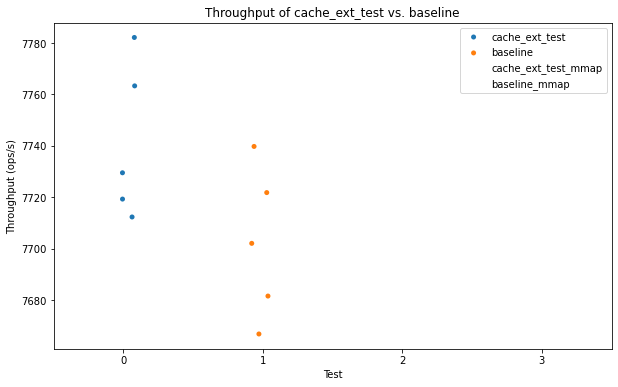

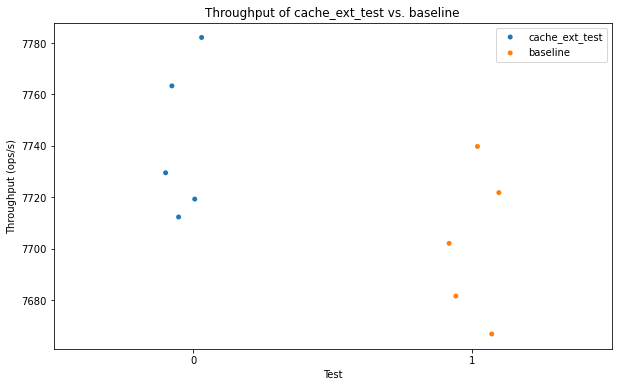

In [5]:
cache_ext_throughputs = [result["results"]["throughput_avg"] for result in cache_ext_results]
cache_ext_mmap_throughputs = [result["results"]["throughput_avg"] for result in cache_ext_mmap_results]
baseline_throughputs = [result["results"]["throughput_avg"] for result in baseline_results]
baseline_mmap_throughputs = [result["results"]["throughput_avg"] for result in baseline_mmap_results]

# Plot the results with matplotlib
# Use a strip plot



plt.figure(figsize=(10, 6))
plt.title("Throughput of cache_ext_test vs. baseline")
plt.ylabel("Throughput (ops/s)")
plt.xlabel("Test")
plt.xticks([0, 1, 2, 3], ["cache_ext_test", "baseline", "cache_ext_test_mmap", "baseline_mmap"])
sns.stripplot(data=[cache_ext_throughputs, baseline_throughputs,
                    cache_ext_mmap_throughputs, baseline_mmap_throughputs],
              jitter=True)
plt.legend(["cache_ext_test", "baseline", "cache_ext_test_mmap", "baseline_mmap"])
plt.show()

# Also do a separate plot for non-mmap
plt.figure(figsize=(10, 6))
plt.title("Throughput of cache_ext_test vs. baseline")
plt.ylabel("Throughput (ops/s)")
plt.xlabel("Test")
plt.xticks([0, 1], ["cache_ext_test", "baseline"])
sns.stripplot(data=[cache_ext_throughputs, baseline_throughputs],
              jitter=True)
plt.legend(["cache_ext_test", "baseline"])
plt.show()


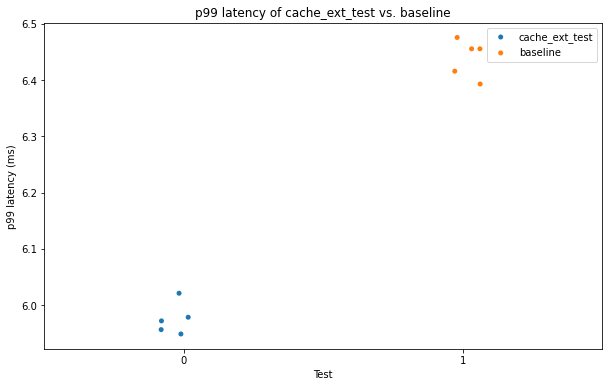

In [6]:
# Plot the p99 latencies as well

cache_ext_p99s = [result["results"]["latency_p99"] / 10**6 for result in cache_ext_results]
baseline_p99s = [result["results"]["latency_p99"] / 10**6 for result in baseline_results]

plt.figure(figsize=(10, 6))
plt.title("p99 latency of cache_ext_test vs. baseline")
plt.ylabel("p99 latency (ms)")
plt.xlabel("Test")
plt.xticks([0, 1], ["cache_ext_test", "baseline"])
sns.stripplot(data=[cache_ext_p99s, baseline_p99s],
              jitter=True)
plt.legend(["cache_ext_test", "baseline"])
plt.show()

[{"enable_mmap": false, "cgroup": "cache_ext_test", "cgroup_size_in_bytes": 5368709120, "run_id": "02ab7aaf01cc4108801acc612d956a08", "benchmark": "ycsb_c", "results": {"update_throughput_avg": 0.0, "insert_throughput_avg": 0.0, "read_throughput_avg": 7412.83, "scan_throughput_avg": 306.5, "read_modify_write_throughput_avg": 0.0, "throughput_avg": 7719.33, "update_latency_avg": 0.0, "update_latency_p99": 0.0, "insert_latency_avg": 0.0, "insert_latency_p99": 0.0, "read_latency_avg": 981764.33, "latency_avg": 981764.33, "read_latency_p99": 6021076.25, "latency_p99": 6021076.25, "scan_latency_avg": 2216951.23, "scan_latency_p99": 17934183.4, "read_modify_write_latency_avg": 0.0, "read_modify_write_latency_p99": 0.0}}, {"enable_mmap": false, "cgroup": "cache_ext_test", "cgroup_size_in_bytes": 5368709120, "run_id": "8a6477fc789e47d8944c8ea4b7084566", "benchmark": "ycsb_c", "results": {"update_throughput_avg": 0.0, "insert_throughput_avg": 0.0, "read_throughput_avg": 7472.9, "scan_throughput

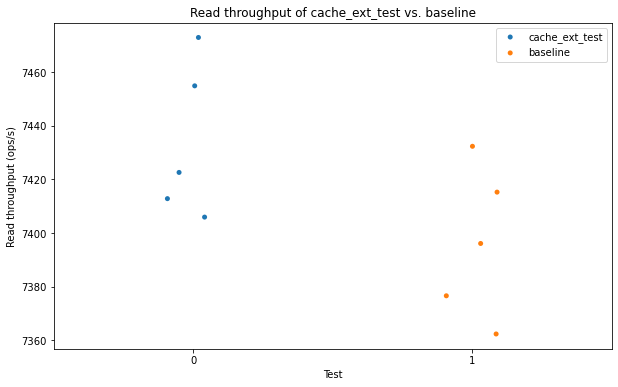

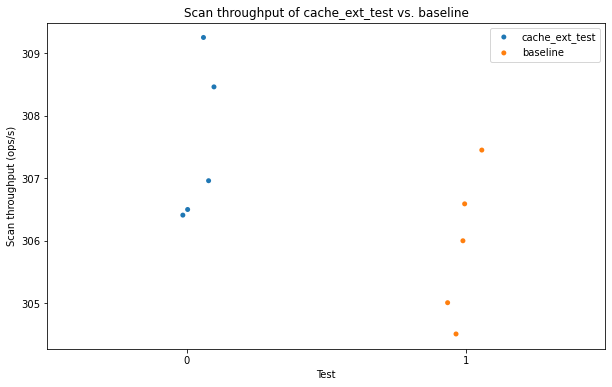

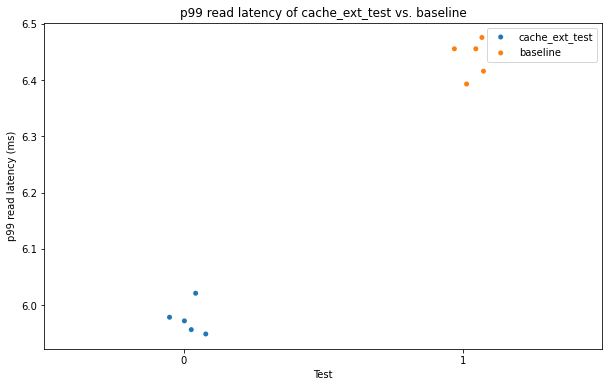

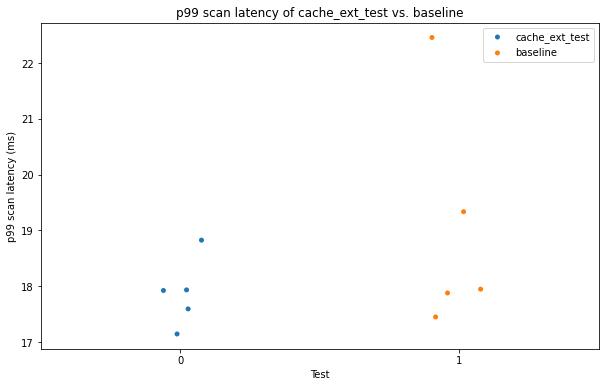

In [13]:
# Mixed GET/SCAN workload

def is_mixed_get_scan_workload(result):
    return result["results"]["read_throughput_avg"] != 0 and result["results"]["scan_throughput_avg"] != 0

all_results = load_json("results.json")
mixed_get_scan_results = list(filter(is_mixed_get_scan_workload, all_results))

print(json.dumps(mixed_get_scan_results))

# Plot read throughput of cache_ext vs baseline
cache_ext_results = [result for result in mixed_get_scan_results if result["cgroup"] == "cache_ext_test"]
baseline_results = [result for result in mixed_get_scan_results if result["cgroup"] == "baseline_test"]

cache_ext_read_throughputs = [result["results"]["read_throughput_avg"] for result in cache_ext_results]
baseline_read_throughputs = [result["results"]["read_throughput_avg"] for result in baseline_results]

plt.figure(figsize=(10, 6))
plt.title("Read throughput of cache_ext_test vs. baseline")
plt.ylabel("Read throughput (ops/s)")
plt.xlabel("Test")
plt.xticks([0, 1], ["cache_ext_test", "baseline"])
sns.stripplot(data=[cache_ext_read_throughputs, baseline_read_throughputs],
              jitter=True)
plt.legend(["cache_ext_test", "baseline"])
plt.show()

# Plot scan throughput of cache_ext vs baseline
cache_ext_scan_throughputs = [result["results"]["scan_throughput_avg"] for result in cache_ext_results]
baseline_scan_throughputs = [result["results"]["scan_throughput_avg"] for result in baseline_results]

plt.figure(figsize=(10, 6))
plt.title("Scan throughput of cache_ext_test vs. baseline")
plt.ylabel("Scan throughput (ops/s)")
plt.xlabel("Test")
plt.xticks([0, 1], ["cache_ext_test", "baseline"])
sns.stripplot(data=[cache_ext_scan_throughputs, baseline_scan_throughputs],
              jitter=True)
plt.legend(["cache_ext_test", "baseline"])
plt.show()

# Plot p99 latency of cache_ext vs baseline for read and scan
cache_ext_read_p99s = [result["results"]["read_latency_p99"] / 10**6 for result in cache_ext_results]
baseline_read_p99s = [result["results"]["read_latency_p99"] / 10**6 for result in baseline_results]

plt.figure(figsize=(10, 6))
plt.title("p99 read latency of cache_ext_test vs. baseline")
plt.ylabel("p99 read latency (ms)")
plt.xlabel("Test")
plt.xticks([0, 1], ["cache_ext_test", "baseline"])
sns.stripplot(data=[cache_ext_read_p99s, baseline_read_p99s],
              jitter=True)
plt.legend(["cache_ext_test", "baseline"])
plt.show()


cache_ext_scan_p99s = [result["results"]["scan_latency_p99"] / 10**6 for result in cache_ext_results]
baseline_scan_p99s = [result["results"]["scan_latency_p99"] / 10**6 for result in baseline_results]

plt.figure(figsize=(10, 6))
plt.title("p99 scan latency of cache_ext_test vs. baseline")
plt.ylabel("p99 scan latency (ms)")
plt.xlabel("Test")
plt.xticks([0, 1], ["cache_ext_test", "baseline"])
sns.stripplot(data=[cache_ext_scan_p99s, baseline_scan_p99s],
              jitter=True)
plt.legend(["cache_ext_test", "baseline"])
plt.show()



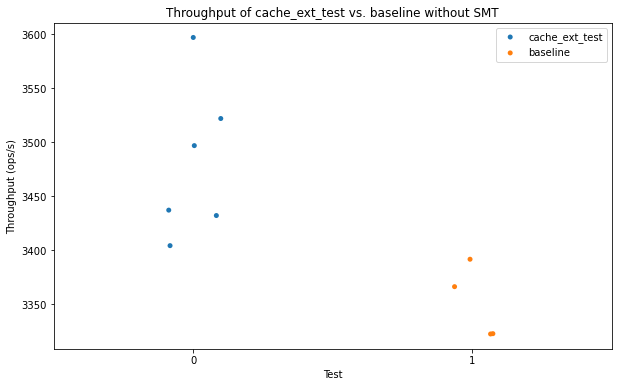

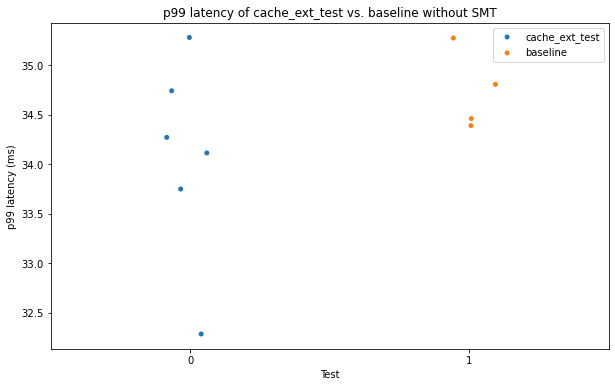

In [7]:
# Load results without SMT
no_smt_results = load_json("results_no_smt.json")

cache_ext_no_smt_results = []
baseline_no_smt_results = []

for result in no_smt_results:
    if result["cgroup"] == "cache_ext_test":
        cache_ext_no_smt_results.append(result)
    else:
        baseline_no_smt_results.append(result)

cache_ext_no_smt_throughputs = [result["results"]["throughput_avg"] for result in cache_ext_no_smt_results]
baseline_no_smt_throughputs = [result["results"]["throughput_avg"] for result in baseline_no_smt_results]

# Plot the results with matplotlib
# Use a strip plot

plt.figure(figsize=(10, 6))
plt.title("Throughput of cache_ext_test vs. baseline without SMT")
plt.ylabel("Throughput (ops/s)")
plt.xlabel("Test")
plt.xticks([0, 1], ["cache_ext_test", "baseline"])
sns.stripplot(data=[cache_ext_no_smt_throughputs, baseline_no_smt_throughputs],
              jitter=True)
plt.legend(["cache_ext_test", "baseline"])
plt.show()


# Plot the p99 latencies as well
cache_ext_no_smt_p99s = [result["results"]["latency_p99"] / 10**6 for result in cache_ext_no_smt_results]
baseline_no_smt_p99s = [result["results"]["latency_p99"] / 10**6 for result in baseline_no_smt_results]

plt.figure(figsize=(10, 6))
plt.title("p99 latency of cache_ext_test vs. baseline without SMT")
plt.ylabel("p99 latency (ms)")
plt.xlabel("Test")
plt.xticks([0, 1], ["cache_ext_test", "baseline"])
sns.stripplot(data=[cache_ext_no_smt_p99s, baseline_no_smt_p99s],
              jitter=True)
plt.legend(["cache_ext_test", "baseline"])
plt.show()

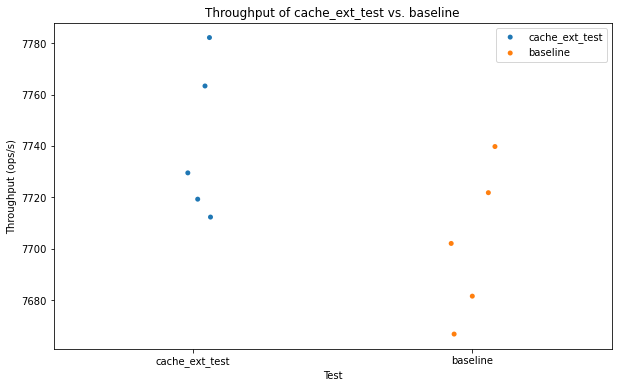

Mean throughput of cache_ext_test: 7741.35
Mean throughput of baseline_test: 7702.46
Percentage difference: 0.50%


In [8]:
def plot_baseline_vs_cache_ext(results_file: str):
    results = load_json(results_file)
    cache_ext_results = [r for r in results if r["cgroup"] == "cache_ext_test"]
    baseline_results = [r for r in results if r["cgroup"] == "baseline_test"]
    cache_ext_throughputs = [r["results"]["throughput_avg"] for r in cache_ext_results]
    baseline_throughputs = [r["results"]["throughput_avg"] for r in baseline_results]
    # Also do a separate plot for non-mmap
    plt.figure(figsize=(10, 6))
    plt.title("Throughput of cache_ext_test vs. baseline")
    plt.ylabel("Throughput (ops/s)")
    plt.xlabel("Test")
    sns.stripplot(data=[cache_ext_throughputs, baseline_throughputs],
                  jitter=True)
    plt.xticks([0, 1], ["cache_ext_test", "baseline"])
    plt.legend(["cache_ext_test", "baseline"])
    plt.show()

    # Print mean throughput stats
    cache_ext_mean = sum(cache_ext_throughputs) / len(cache_ext_throughputs)
    baseline_mean = sum(baseline_throughputs) / len(baseline_throughputs)
    diff_pct = (cache_ext_mean - baseline_mean) / baseline_mean * 100
    print(f"Mean throughput of cache_ext_test: {cache_ext_mean:.2f}")
    print(f"Mean throughput of baseline_test: {baseline_mean:.2f}")
    print(f"Percentage difference: {diff_pct:.2f}%")

plot_baseline_vs_cache_ext("results.json")
# plot_baseline_vs_cache_ext("results_sampling.json")